In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
% matplotlib inline

In [3]:
driver = pd.read_csv('../data/ffm/data/ffm_score_driver.csv')
scores = pd.read_csv('../data/ffm/model/score_test', header = None)
scores.columns = ['ffm']
data = driver.join(scores)
data = data[['user_id','product_id','ffm']]

In [ ]:
# data.to_csv('../data/ffm/ffm_score.csv', index=False)

In [ ]:
# ffm-train -k 4 -r 0.0045 -s 6 -p ./ffm_score --auto-stop ./ffm_train
#   15      0.25167      0.21117        156.7

In [5]:
scores = pd.read_csv('../data/model/score/score_n.csv')
scores = scores.merge(data, on=['user_id', 'product_id'])
scores = scores[scores['eval_set'] == 'valid']
scores = scores[scores['product_id'] != 0]
scores['bin'] = pd.qcut(scores['ffm'], q=50, labels=False)

In [6]:
raddar = scores.groupby('bin')[['score','reordered']].mean().reset_index()
raddar['diff'] = abs(raddar['score'] - raddar['reordered']) / raddar['reordered']

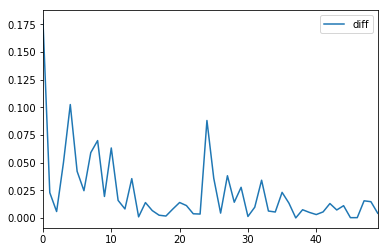

In [7]:
raddar[['diff']].plot()

In [8]:
raddar

,bin,score,reordered,diff
0,0,0.005582,0.004736,0.178615
1,1,0.006649,0.006501,0.022874
2,2,0.007311,0.007354,0.005835
3,3,0.008246,0.007853,0.049980
4,4,0.009162,0.010208,0.102468
5,5,0.010565,0.011030,0.042161
6,6,0.011968,0.011680,0.024649
7,7,0.013258,0.014090,0.059045
8,8,0.014747,0.015856,0.069908
9,9,0.016492,0.016178,0.019440
